In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [23]:
image_size = 256
epochs = 50
batch_size = 32

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\SummerDB\Tensorflow Projects",
    image_size = (image_size, image_size),
    batch_size = batch_size
)

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\jaisw\AppData\Local\Temp\ipykernel_10452\758121106.py:2: SyntaxWarning: invalid escape sequence '\S'
  "C:\SummerDB\Tensorflow Projects",


Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(256, 256, 3)


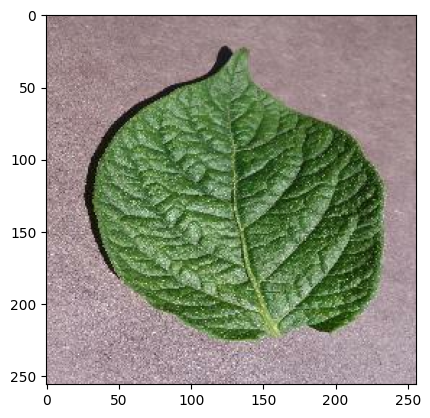

In [35]:
for image_batch, label in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print(image_batch[0].shape)

In [24]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [25]:
def get_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True):
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [26]:
train_ds, val_ds, test_ds = get_partition(dataset)

In [27]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [30]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(image_size, image_size),
    layers.Rescaling(1.0/255)
])

In [31]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])